<img src="http://drive.google.com/uc?export=view&id=1tpOCamr9aWz817atPnyXus8w5gJ3mIts" width=500px>

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Mobile Phone Review Analysis

## Context

The product companies can utilize the detailed review comments to gather insights from the end user. Most of the products are sold via e-commerce sites like Flipkart or Amazon where customers can buy a product and give their review about the product on the web site. 
Product managers can identify the relevant reviews from the website and run a sentiment analysis tool to understand what the sentiments of the customer are. Based on their sentiments, they can identify what users think of the current product. Are they happy? Discontent? 
They can also come up with a document that lists the features, the team needs to focus on for making the product better. 

## Objective

Given the review data rating label, we will try to get insights about various brands and their ratings using text analytics and build a model to predict the rating and overall sentiment. 


### Package version

- tensorflow==2.3.0
- scikit-learn==0.22.2.post1
- pandas==1.0.5
- numpy==1.18.5
- matplotlib==3.2.2
- google==2.0.3

### Data Dictionary 

product_data.csv - contains product details
- 'asin',  - Product ASIN
- 'brand', - Product Brand
- 'title', - Product Title
- 'url',  - Product URL
- 'image', - Product Image URL
- 'rating',- Product Avg. Rating
- 'reviewUrl' - Product Review Page URL
- 'totalReviews' - Product Total Reviews
- ‘price’ - Product Price ($)
- ‘originalPrice’ - Product Original Price ($)
 
reviews.csv  - contains user review details
 
- 'asin' - Product ASIN
- 'name' - Reviewer Name
- 'rating' - Reviewer Rating (scale 1 to 5)
- 'date'  - Review Date
- 'verified' - Valid Customer
- 'title'  - Review Title
- 'body'  - Review Content
- 'helpfulVotes  - Helpful Feedbacks


## Table of Content

1. Import Libraries

2. Setting options

3. Read Data

4. Data Analysis and EDA

5. Text preprocessing and Vectorization

6. Model building

7. Conclusion and Interpretation

## 1. Import Libraries

Let us start by mounting the drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Let us check for the version of installed tensorflow.

In [2]:
# used to supress display of warnings
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# Pandas is used for data manipulation and analysis
import pandas as pd 

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns
import tensorflow 
print(tensorflow.__version__)

2.4.1


## 2. Setting Options

In [3]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

In [4]:
os.chdir("/content/drive/MyDrive/Colab Notebooks/Great_Learning/Lab AIML/Statistical NLP")
os.getcwd()

'/content/drive/MyDrive/Colab Notebooks/Great_Learning/Lab AIML/Statistical NLP'

## 3. Read Data

### 3.1 Read the provided CSVs and check 5 random samples and shape to understand the datasets

In [5]:
products = pd.read_csv("product_data.csv")
reviews = pd.read_csv("reviews.csv")

In [6]:
print("Products data: ")
products.sample(5)

Products data: 


,asin,brand,title,url,image,rating,reviewUrl,totalReviews,price,originalPrice
452,B07HCQ8VDQ,Samsung,"Samsung Galaxy Note 5 N920A, Black 32GB - at&T...",https://www.amazon.com/Samsung-Galaxy-Note-N92...,https://m.media-amazon.com/images/I/71dPOKaPwb...,3.3000000,https://www.amazon.com/product-reviews/B07HCQ8VDQ,50,262.4900000,299.9900000
438,B07GWFMLT8,Samsung,Samsung Galaxy Note 9 SM-N960F/DS 512GB/8GB (M...,https://www.amazon.com/Samsung-Galaxy-SM-N960F...,https://m.media-amazon.com/images/I/71BG9iPLRk...,4.8000000,https://www.amazon.com/product-reviews/B07GWFMLT8,18,677.0000000,0.0000000
373,B07BFHTJTK,Samsung,Samsung Galaxy S7 Edge G935v 32GB Smartphone f...,https://www.amazon.com/Samsung-Smartphone-Wire...,https://m.media-amazon.com/images/I/614dxJxan4...,3.6000000,https://www.amazon.com/product-reviews/B07BFHTJTK,27,179.0000000,0.0000000
677,B07XQJ33PL,Samsung,"Samsung Galaxy A10s (32GB, 2GB RAM) 6.2"" HD+ I...",https://www.amazon.com/Samsung-Infinity-V-Disp...,https://m.media-amazon.com/images/I/51wPu6Z989...,4.2000000,https://www.amazon.com/product-reviews/B07XQJ33PL,98,135.9900000,142.4700000
86,B00QHJTOK0,Samsung,Samsung Galaxy Centura SCH-S738C - (Net10),https://www.amazon.com/Samsung-Galaxy-Centura-...,https://m.media-amazon.com/images/I/411mIDKCYz...,1.0000000,https://www.amazon.com/product-reviews/B00QHJTOK0,1,0.0000000,0.0000000


In [7]:
print("Reviews data: ")
reviews.sample(5)

Reviews data: 


,asin,name,rating,date,verified,title,body,helpfulVotes
14488,B00OZTSY6Y,Amazon Customer,2,"May 3, 2017",True,"Worked fair for first 20 days, voice volume fo...","Worked fair for first 20 days, voice volume fo...",nan
42806,B077J7H62P,DSP,5,"September 5, 2019",True,Just what I wanted!,It seems great!,nan
2374,B00836Y6B2,Jvans,4,"September 16, 2013",True,Generally a pretty good phone,My order was fulfilled by TABLET DISTRIBUTORS ...,2.0000000
60080,B07Q26V49K,Amazon Customer,5,"November 17, 2019",True,Excelente producto,Muy bueno,nan
46380,B07BFPDGNX,Molly K Bradley,5,"March 12, 2019",True,All over great phone,All over great phone.,nan


### Inferences:- We have unstructured data(textual) within structured data in reviews dataset.

In [8]:
print("Shape of Products Data: ", products.shape)
print("Shape of Reviews Data: ", reviews.shape)

Shape of Products Data:  (720, 10)
Shape of Reviews Data:  (67986, 8)


## 4.  Data Analysis and EDA

### 4.1 Drop unnecessary columns like 'url', 'image' from the product_data

In [9]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   asin           720 non-null    object 
 1   brand          716 non-null    object 
 2   title          720 non-null    object 
 3   url            720 non-null    object 
 4   image          720 non-null    object 
 5   rating         720 non-null    float64
 6   reviewUrl      720 non-null    object 
 7   totalReviews   720 non-null    int64  
 8   price          720 non-null    float64
 9   originalPrice  720 non-null    float64
dtypes: float64(3), int64(1), object(6)
memory usage: 56.4+ KB


In [10]:
products.drop(columns = ["url","image","reviewUrl"], axis=1,inplace = True)

### Inferenes:- Dropping unnecessary columns like 'url', 'image' and 'reviewUrl'.

In [11]:
products.columns

Index(['asin', 'brand', 'title', 'rating', 'totalReviews', 'price',
       'originalPrice'],
      dtype='object')

### 4.2 Check statistical summary of both datasets. Note:- Include both numerical and object type columns.

In [12]:
products.describe(include = 'all')

,asin,brand,title,rating,totalReviews,price,originalPrice
count,720,716,720,720.0000000,720.0000000,720.0000000,720.0000000
unique,720,10,718,nan,nan,nan,nan
top,B07SFZ88SY,Samsung,Google Pixel 2 XL 128GB Unlocked GSM/CDMA 4G L...,nan,nan,nan,nan
freq,1,346,2,nan,nan,nan,nan
mean,NaN,NaN,NaN,3.7137500,105.6791667,234.9489306,63.6907778
std,NaN,NaN,NaN,0.7160138,167.6011014,200.0084407,172.4053696
min,NaN,NaN,NaN,1.0000000,1.0000000,0.0000000,0.0000000
25%,NaN,NaN,NaN,3.3000000,7.0000000,97.5125000,0.0000000
50%,NaN,NaN,NaN,3.8000000,32.0000000,188.9750000,0.0000000
75%,NaN,NaN,NaN,4.1000000,122.2500000,336.7250000,0.0000000


### Inferences:-
#### 1.10 unique brands of which top brand is Samsung.
#### 2.Overall Ratings is normally distributed.
#### 3.Median rating is 3.8.
#### 4. Price column seems to have junk values as theres huge difference in 75th quartile and max price and original price.


In [13]:
reviews.describe(include = 'all')

,asin,name,rating,date,verified,title,body,helpfulVotes
count,67986,67984,67986.0000000,67986,67986,67972,67965,27215.0000000
unique,720,47323,nan,2983,2,41489,59811,nan
top,B00F2SKPIM,Amazon Customer,nan,"December 11, 2019",True,Five Stars,Good,nan
freq,981,6507,nan,234,61225,6043,303,nan
mean,NaN,NaN,3.8079163,NaN,NaN,NaN,NaN,8.2296895
std,NaN,NaN,1.5829058,NaN,NaN,NaN,NaN,31.9548772
min,NaN,NaN,1.0000000,NaN,NaN,NaN,NaN,1.0000000
25%,NaN,NaN,3.0000000,NaN,NaN,NaN,NaN,1.0000000
50%,NaN,NaN,5.0000000,NaN,NaN,NaN,NaN,2.0000000
75%,NaN,NaN,5.0000000,NaN,NaN,NaN,NaN,5.0000000


### Inferences:-
#### 1.61255 reviews are verified.
#### 2.Ratings are left - skewed.

### 4.3 From the above statistical summary, write inferences like count of unique products, top brand, top title, range of rating, price range, etc

### Inferences:-
#### 1.Top Brand is Samsung followed by Apple.
#### 2.720 Unique products are available.
#### 3.Top title for review is "Five Stars".
#### 4.Ratings range between 1 and 5.
#### 5.Prices range from 0 to 999 which logically not correct hence it can be concluded that price data has junk values.

### 4.4 Analyze the distribution of ratings and other categorical features like brand, etc

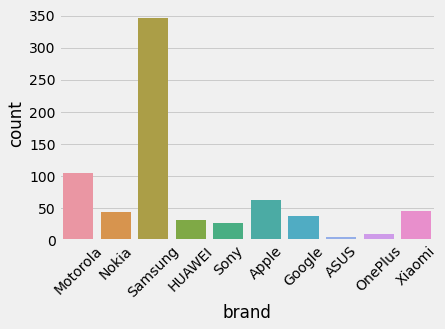

In [14]:
plt.style.use('fivethirtyeight')
plt.xticks(rotation=45)
sns.countplot(products['brand'])

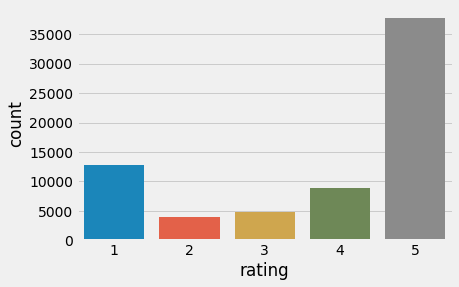

In [15]:
sns.countplot(reviews['rating'])

### Inferences:-
#### 1. Maximum rating is of "5".
#### 2. Ratings is highly imbalanced.

### 4.5 Display average rating per brand

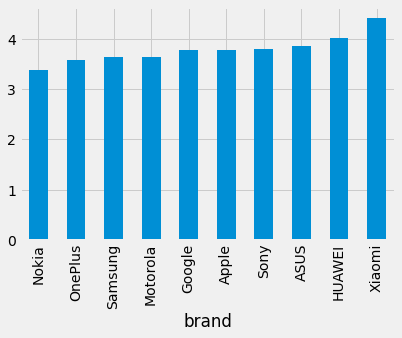

In [16]:
products.groupby('brand').mean()['rating'].sort_values().plot(kind='bar')

### Inferences:- Xiaomi brand has maximum ratings.

### 4.6 Display average price per brand

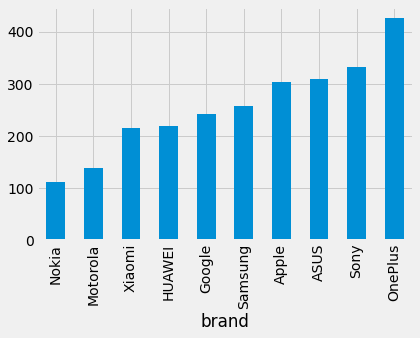

In [17]:
products.groupby('brand').mean()['price'].sort_values().plot(kind='bar')

### Inference:- Logically Apple brand should have max mean price compared to other brands but since data shows OnePlus hence it can be concluded that data is not true to real world that is it has junk values and be excluded from model building or correct the data according to real world.


### 4.7 Display average 'totalReviews' per brand

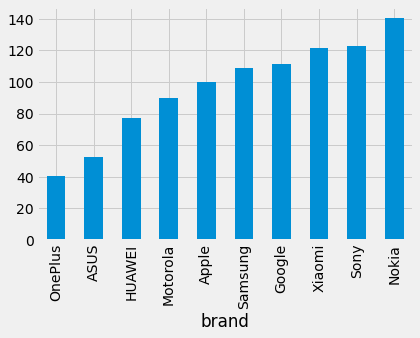

In [18]:
products.groupby('brand').mean()['totalReviews'].sort_values().plot(kind='bar')

### Inferences:- Nokia has more no. of reviews but ratings is low hence it can be concluded that there are lots of unsatisfied customer who are giving the reviews.

### 4.8 Merge two datasets using 'asin' and check the shape of the final dataset

In [19]:
df = pd.merge(reviews,products, on='asin', how='inner')
df.sample(5)

,asin,name,rating_x,date,verified,title_x,body,helpfulVotes,brand,title_y,rating_y,totalReviews,price,originalPrice
12511,B00MWI4KKE,Paul,5,"February 24, 2016",True,Moto X (2nd Gen) Hits the Mark,Great phone for the price. Very good screen re...,nan,Motorola,Motorola Moto X (2nd generation) XT1097 GSM Un...,3.5000000,428,0.0000000,0.0000000
10492,B00JH2WF0K,Robert Osthues,1,"January 26, 2018",True,Screen too small,"Looked like a Convoy 3 in the add, but the scr...",nan,Samsung,"Samsung Gusto 3, Dark Blue, Verizon Wireless",3.2000000,81,0.0000000,0.0000000
57018,B07N91S9MW,JuIien Alexander,1,"December 8, 2019",False,Phone's OS completely died,"Phone's OS died after a week, no support, lost...",nan,Motorola,Moto G7 – Unlocked – 64 GB – Ceramic Black (US...,4.1000000,361,179.9900000,299.9900000
54890,B07K1M36CM,Brian,5,"December 9, 2018",True,Great phone,"It's a great phone, loved the mate 10 pro, and...",8.0000000,HUAWEI,Huawei Mate 20 Pro LYA-L29 128GB + 6GB - Facto...,4.6000000,153,459.9900000,0.0000000
18924,B015ROR4PC,Jim S,5,"September 3, 2016",True,"Very good, solid smartphone","Very good, solid smartphone. Keeps a charge fo...",1.0000000,Motorola,Motorola Droid Turbo - 32GB Android Smartphone...,3.5000000,36,74.9900000,0.0000000


In [20]:
print('Shape of data', df.shape)

Shape of data (67986, 14)


### 4.9 Rename important features with appropriate names.
Imortant features - "rating_x": "user_rating", "title_x": "review_title", "title_y": "item_title", "rating_y": "overall_rating"

In [21]:
df.rename(columns={"rating_x": "user_rating", "title_x": "review_title", "title_y": "item_title", "rating_y": "overall_rating"},inplace=True)

In [22]:
df.columns

Index(['asin', 'name', 'user_rating', 'date', 'verified', 'review_title',
       'body', 'helpfulVotes', 'brand', 'item_title', 'overall_rating',
       'totalReviews', 'price', 'originalPrice'],
      dtype='object')

### Inferences:- Feature names have been change to appropriate names for ease of understanding.

### 4.10 Select rows having verified reviews and check the shape of the final dataset

In [23]:
df.verified.value_counts()

True     61225
False     6761
Name: verified, dtype: int64

### Inferences:- We have 6761 unverified reviews which can be dropped.

In [24]:
df_v = df[df['verified']==True]

In [25]:
print('Shape of verified reviews data: ', df_v.shape)

Shape of verified reviews data:  (61225, 14)


### 4.11 Check the number of reviews for various brands and report the brand that have highest number of reviews

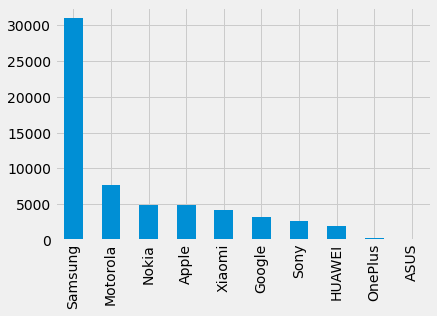

In [26]:
df_v['brand'].value_counts().plot(kind='bar')

### Inferences:- 
#### 1.Here each row is an review for a product so a simple value_counts will gives no. of reviews. 
#### 2. Samsung has most number of reviews and ASUS has the least.

### 4.12 Drop irrelevant columns and keep important features like 'brand','body','price','user_rating','review_title' for further analysis

In [27]:
df_v = df_v[['brand','body','user_rating','review_title']]

### Inference:- 
#### 1.Dropping all irrelevant columns including 'price' as we have established earlier that it contains junk values and can't be used for model building.
#### 2.Using only cloumns 'brand','body','user_rating','review_title' only.

### 4.13 Perform univariate analysis. Check distribution of price, user_rating

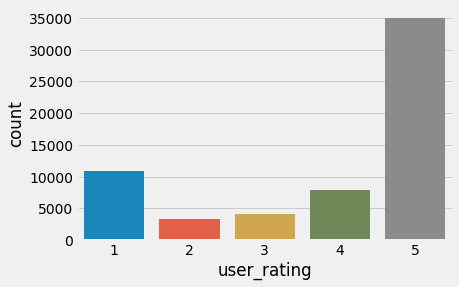

In [28]:
sns.countplot(df_v['user_rating'])

### Inference:- Data biased towards rating of "5".

### 4.14 Create a new column called "sentiment". It should have value as 1 (positive) if the user_Rating is greater than 3, value as 0 (neutral) if the user_Rating == 3, and -1 (negative) is the user_Rating is less than 3.

In [29]:
df_v['sentiment'] = df_v['user_rating'].apply(lambda x: 1 if x>3 else (0 if x==3else -1))
df_v['sentiment'].sample(5)

1706    -1
35161   -1
30294   -1
54903    1
43167    1
Name: sentiment, dtype: int64

### 4.15 Check frequency distribution of the 'sentiment'

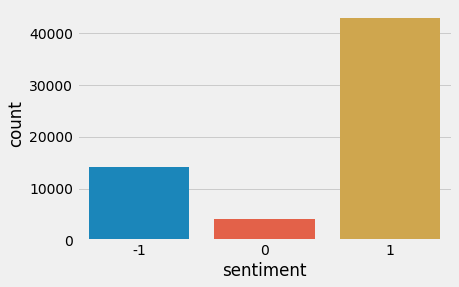

In [30]:
sns.countplot(df_v['sentiment'])

### Inference:- We have max positve sentiment and min of neutral sentiment.

### 4.16 Perform bivariate analysis. Check correlation/crosstab between features and write your inferences.

In [31]:
pd.crosstab(df_v['sentiment'],df_v['brand'],margins=True).style.background_gradient(cmap='Set2')

brand,ASUS,Apple,Google,HUAWEI,Motorola,Nokia,OnePlus,Samsung,Sony,Xiaomi,All
sentiment,,,,,,,,,,,
-1,49,1320,804,261,1667,1437,34,7469,663,427,14131
0,20,307,207,105,553,467,11,2030,216,201,4117
1,137,3249,2152,1653,5494,2974,259,21521,1812,3579,42830
All,206,4876,3163,2019,7714,4878,304,31020,2691,4207,61078


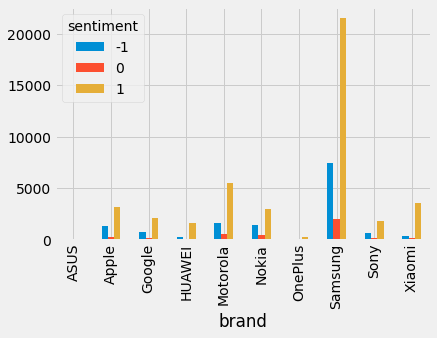

In [32]:
pd.crosstab(df_v['sentiment'],df_v['brand']).T.plot(kind = 'bar')

### Inferences:- 
#### 1.Samsung, Apple and Motrola have maximum positive and negative sentiment.
#### 2.Xiamoi, OnePlus and HUAWEI has more postive sentiment compared to their negative sentiment.

## 5. Text Preprocessing and Vectorization

We will analyze the 'body' and 'review_title' to gain more understanding.

We will ppeform the below tasks

- Convert the text into lowercase
- Remove punctuation
- Remove stopwords (English, from nltk corpus)
- Remove other keywords like "phone" and brand name

### 5.1 Change the datatype of the 'body' column to 'str' and convert it into lowercase. Print any two samples and check the output.

In [33]:
df_v['body'] = df_v['body'].astype('str')

In [34]:
df_v['body'] = df_v['body'].str.lower()

In [35]:
df_v['body'].sample(2)

31997    i was skeptical about ordering an iphone from ...
42339    the model advertised is a1865, the one i recei...
Name: body, dtype: object

In [36]:
df_v['review_title'] = df_v['review_title'].str.lower()

In [37]:
df_v['review_title'].sample(2)

8793     four stars
33548    five stars
Name: review_title, dtype: object

### 5.2 Remove punctuations from the lowercased 'body' column and display at least two samples.

In [38]:
df_v['body'] = df_v['body'].str.replace('[^\w\s]','') # REGEX :: ^ = except, \w = a-z & 0-9, \s = white space

In [39]:
df_v['body'].sample(2)

67865    best budget phone
14131       great products
Name: body, dtype: object

In [40]:
df_v['review_title'] = df_v['review_title'].str.replace('[^\w\s]','')

In [41]:
df_v['review_title'].sample(2)

47226    i love this phone so far
33484                  five stars
Name: review_title, dtype: object

In [42]:
df_v['body'].isnull().sum()

0

### 5.3 Remove stop words from the above pre-processed 'body' column and display at least two samples.

In [43]:
import nltk

In [44]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [45]:
df_v['body'] = df_v['body'].apply(lambda x: ' '.join(word for word in x.split() if word not in (stop_words)))

In [46]:
df_v['body'].sample(2)

2796     loved phone started malfunctioning late januar...
64874    disapointed order nerver received waiting cash...
Name: body, dtype: object

### 5.4 Apply lemmatisation on the above preprocessed text and display a few samples

In [47]:
nltk.download('wordnet')

lemmatizer = nltk.WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [48]:
def lemmatize_text(text):
  return [' '.join([lemmatizer.lemmatize(word) for word in review.split()]) for review in text]

In [49]:
df_v['text_lemmatized'] = lemmatize_text(df_v['body'].tolist())

In [50]:
df_v.sample(2)

,brand,body,user_rating,review_title,sentiment,text_lemmatized
40713,Samsung,works visible signs prior use speaker sounds b...,4,almost perfect,1,work visible sign prior use speaker sound bit ...
57544,Motorola,far good enjoyed moto g4 g7 improvement especi...,5,great phone at great price,1,far good enjoyed moto g4 g7 improvement especi...


### 5.5 Write a function to check word frequency of the text

In [51]:
from collections import Counter
counts = Counter(df_v['body']).most_common(10)
print(counts)

[('good', 737), ('great phone', 409), ('love', 373), ('great', 248), ('love phone', 225), ('excellent', 221), ('excelente', 198), ('good phone', 176), ('perfect', 169), ('ok', 144)]


### 5.6 Check word frequency of review having top ratings (sentiment = 1) and display output of few samples

In [52]:
df_new_top = df_v[df_v['sentiment']==1]['body']

In [53]:
counts = Counter(df_new_top).most_common(10)
print(counts)

[('good', 683), ('great phone', 408), ('love', 369), ('great', 247), ('love phone', 225), ('excellent', 221), ('excelente', 198), ('good phone', 171), ('perfect', 169), ('nice', 129)]


### 5.7 Initialize tf-idf vectorizer and transform the preprocessed body text

In [54]:
# import and instantiate TF-IDF Vectorizer (with the default parameters)
from sklearn.feature_extraction.text import TfidfVectorizer
tvect = TfidfVectorizer()

In [55]:
X = tvect.fit_transform(df_v['body'])

In [56]:
X

<61225x38370 sparse matrix of type '<class 'numpy.float64'>'
	with 1190428 stored elements in Compressed Sparse Row format>

In [57]:
X_new = tvect.fit_transform(df_v['text_lemmatized'])

### 5.8 Segregate the data into dependent (sentiment) and independent (transformed body using tf-idf) features for building a classifier. 

In [58]:
y = df_v['sentiment']

### 5.9 Split the data into Train & Test Sets

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =  0.3, random_state = 42)

In [61]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new,y, test_size =  0.3, random_state = 42)

In [62]:
print("Shape of Train data: ",X_train.shape)
print("Shape of Test data: ",X_test.shape)

Shape of Train data:  (42857, 38370)
Shape of Test data:  (18368, 38370)


In [63]:
print("Shape of Train label: ",y_train.shape)
print("Shape of Test label: ",y_test.shape)

Shape of Train label:  (42857,)
Shape of Test label:  (18368,)


## 6. Model building

### 6.1 Build a random forest classifier to predict the 'sentiment'
### 6.2 Predict on test set
### 6.3 Check accuracy and confusion matrix

In [64]:
#Creating DataFrame for storing the accuracies of all different models
col_names = ['Model', 'Accuracy']
resultsdf = pd.DataFrame(columns = col_names)
print(resultsdf)

Empty DataFrame
Columns: [Model, Accuracy]
Index: []


### Training model without lemmatization

In [65]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=50)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [66]:
r_pred=rf.predict(X_test)

In [67]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy Score of testing set: {}".format(accuracy_score(y_test,r_pred)))
print("Accuracy Score of training set: {}".format(accuracy_score(y_train,rf.predict(X_train))))

Accuracy Score of testing set: 0.8571428571428571
Accuracy Score of training set: 0.9948199827332758


Text(0.5, 1.0, 'Accuracy Score : 0.8571428571428571')

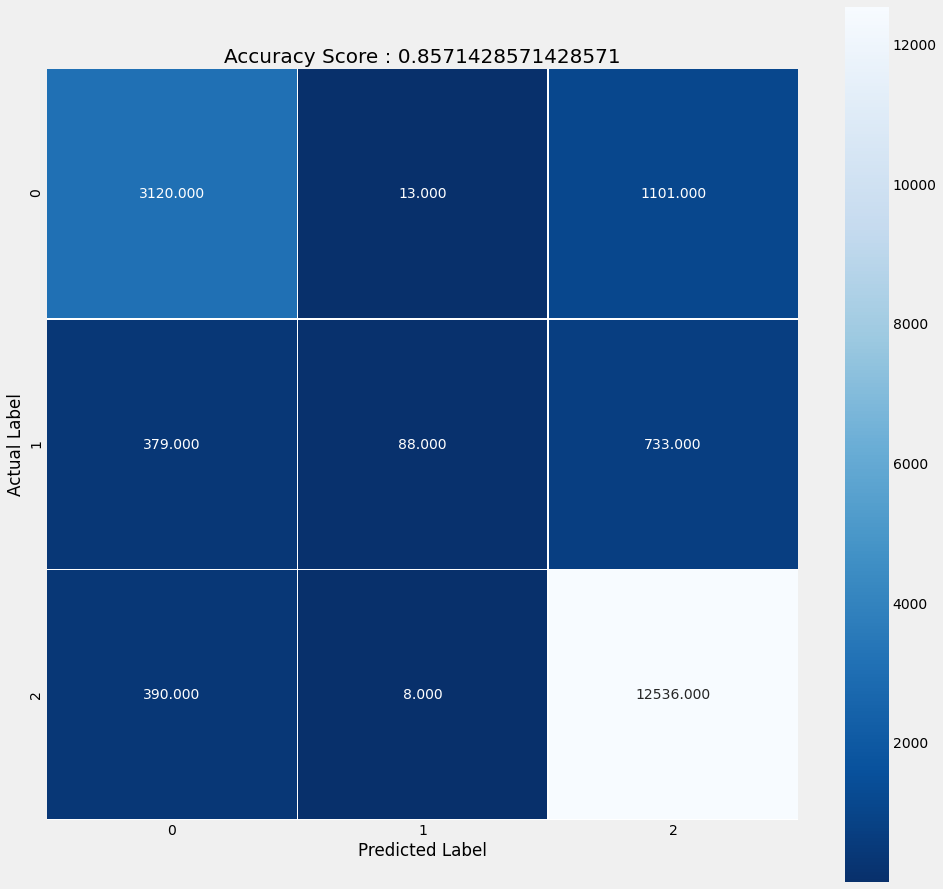

In [68]:
cm = confusion_matrix(y_test, r_pred)
plt.figure(figsize=(15,15))
sns.heatmap(cm, annot = True, fmt = '.3f', linewidths = .5, square = True, cmap='Blues_r')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title = 'Accuracy Score : {0}'.format(accuracy_score(y_test,r_pred))
plt.title(all_sample_title, size = 20)

In [69]:
# Adding Final accuracy value to Results DataFrame
tempResultsDf = pd.DataFrame({'Model':['RF w/o Lemmatizer'],'Accuracy': (accuracy_score(y_test,r_pred))},index={'1'})
resultsdf = pd.concat([resultsdf, tempResultsDf])
resultsdf

,Model,Accuracy
1,RF w/o Lemmatizer,0.8571429


### Training model with lemmatization

In [70]:
from sklearn.ensemble import RandomForestClassifier
rf_1=RandomForestClassifier(n_estimators=50)
rf_1.fit(X_train_new,y_train_new)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [71]:
r1_pred=rf_1.predict(X_test_new)

In [72]:
print("Accuracy Score of lemmatized testing set: {}".format(accuracy_score(y_test_new,r1_pred)))
print("Accuracy Score of lemmatized training set: {}".format(accuracy_score(y_train_new,rf_1.predict(X_train_new))))

Accuracy Score of lemmatized testing set: 0.8540940766550522
Accuracy Score of lemmatized training set: 0.9945866486221621


In [73]:
# Adding Final accuracy value to Results DataFrame
tempResultsDf = pd.DataFrame({'Model':['RF w/ Lemmatizer'],'Accuracy': (accuracy_score(y_test_new,r1_pred))},index={'2'})
resultsdf = pd.concat([resultsdf, tempResultsDf])
resultsdf

,Model,Accuracy
1,RF w/o Lemmatizer,0.8571429
2,RF w/ Lemmatizer,0.8540941


## 7. Write your conclusion

In [74]:
resultsdf

,Model,Accuracy
1,RF w/o Lemmatizer,0.8571429
2,RF w/ Lemmatizer,0.8540941


### Infernce:- Model with lemmatization is only slightly better which means wordnert lemmatizer wasn't good enough. To improve accuracy various lemmatizers needs to tried out and at last hyper-parameter tunning of ML algorithm will give better result.